# Regresión lineal demanda de bicis por estación por mes

## Merge de las bases de datos para todos los meses

In [1]:
# Importar librerías ------------------------------------
import numpy as np 
import pandas as pd

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Leer las bases de datos ----------------------------------------------------------
mes = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre"]
datasets = []

for m in mes:
    dataset = pd.read_csv("~/Documents/GitHub/Optimizacion-de-distribucion-de-bicicletas-en-estaciones-de-MiBici/notebooks/data/" + m + ".csv", encoding='iso-8859-1')
    datasets.append(dataset)

# Juntar todas las bases de datos leídas ----------------------------------------------
new_data = pd.concat(datasets)

In [3]:
new_data.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,A}äe_nacimiento
0,26751198,1350606,M,1983.0,2023-01-01 00:00:41,2023-01-01 00:26:52,154,50,NaN
1,26751199,15163,M,1986.0,2023-01-01 00:04:48,2023-01-01 00:07:46,64,79,NaN
2,26751200,1534764,M,1987.0,2023-01-01 00:06:49,2023-01-01 00:17:36,35,12,NaN
3,26751201,1240140,M,1996.0,2023-01-01 00:08:05,2023-01-01 00:09:00,35,35,NaN
4,26751202,1732214,M,1969.0,2023-01-01 00:09:14,2023-01-01 00:14:57,54,171,NaN


In [4]:
# Eliminar columnas innecesarias ---------------------------------------------------------
new_data.drop(['Genero', 'Año_de_nacimiento','A}äe_nacimiento', 'Fin_del_viaje', 'Viaje_Id', 'Usuario_Id'], axis=1, inplace = True)

In [5]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3211104 entries, 0 to 363858
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Inicio_del_viaje  object
 1   Origen_Id         int64 
 2   Destino_Id        int64 
dtypes: int64(2), object(1)
memory usage: 98.0+ MB


In [6]:
# Convertir columnas tipo string a tipo datetime ------------------------------
new_data['Inicio_del_viaje'] = pd.to_datetime(new_data['Inicio_del_viaje'])
new_data['Inicio_del_viaje'] = new_data['Inicio_del_viaje'].dt.strftime('%B')

In [7]:
new_data.head()

,Inicio_del_viaje,Origen_Id,Destino_Id
0,January,154,50
1,January,64,79
2,January,35,12
3,January,35,35
4,January,54,171


### Ejemplo de regresión para estación 154

In [8]:
estacion_154 = new_data[new_data['Origen_Id'] == 154]
estacion_154.head()

,Inicio_del_viaje,Origen_Id,Destino_Id
0,January,154,50
42,January,154,6
43,January,154,154
48,January,154,154
49,January,154,23


In [9]:
#estacion_154.groupby('Inicio_del_viaje').value_counts(normalize=True).unstack(level='X_t+1')

In [10]:
estacion_154 = estacion_154.groupby(['Inicio_del_viaje']).count()
estacion_154.reset_index(inplace=True)
dummies = pd.get_dummies(estacion_154['Inicio_del_viaje'], prefix='Mes')

# Concatena los nuevos datos dummy con tu DataFrame original
estacion_154 = pd.concat([estacion_154, dummies], axis=1)

# Elimina la columna original "Mes" si ya no la necesitas
estacion_154 = estacion_154.drop('Inicio_del_viaje', axis=1)
estacion_154

,Origen_Id,Destino_Id,Mes_April,Mes_August,Mes_February,Mes_January,Mes_July,Mes_June,Mes_March,Mes_May,Mes_September
0,1680,1680,True,False,False,False,False,False,False,False,False
1,1818,1818,False,True,False,False,False,False,False,False,False
2,1682,1682,False,False,True,False,False,False,False,False,False
3,1860,1860,False,False,False,True,False,False,False,False,False
4,1519,1519,False,False,False,False,True,False,False,False,False
5,1689,1689,False,False,False,False,False,True,False,False,False
6,1925,1925,False,False,False,False,False,False,True,False,False
7,1670,1670,False,False,False,False,False,False,False,True,False
8,1944,1944,False,False,False,False,False,False,False,False,True


In [11]:
import statsmodels.formula.api as smf


modelo=smf.ols(formula='Origen_Id~Mes_April+Mes_August+Mes_February+Mes_January+Mes_July+Mes_June+Mes_March+Mes_May+Mes_September',data=estacion_154)

modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              Origen_Id   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 12 Oct 2023   Prob (F-statistic):                nan
Time:                        22:08:45   Log-Likelihood:                 249.77
No. Observations:                   9   AIC:                            -481.5
Df Residuals:                       0   BIC:                            -479.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1578.70

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [14]:
LRresult = (modelo.summary().tables[1])

summary = pd.DataFrame(LRresult)

y_p = float(str(summary[1][1]))

for x in range(2,len(summary)): 
    y_p += float(str(summary[1][x]))*estacion_154[str(summary[0][x])]
y_p

tabla = pd.DataFrame({'Real': estacion_154['Origen_Id'],
                    'Prediccion':y_p,'Errores': y_p - estacion_154['Origen_Id']})

tabla.head()

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


KeyError: 'Mes_April[T.True]'

ValueError: x and y must be the same size

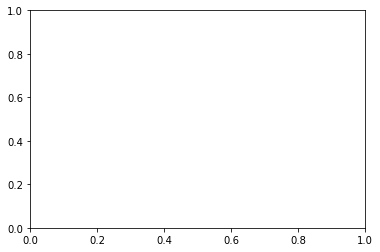

In [13]:
import matplotlib.pyplot as plt

plt.scatter(estacion_154['Origen_Id'],y_p,color='gray')
plt.plot(estacion_154['Origen_Id'],estacion_154['Origen_Id'],color='red')
plt.title("Regresión Lineal para demanda estacion 154", weight = 'bold')
plt.xlabel("Datos reales")
plt.ylabel("Predicción");

#### Probamos con estación 35 para ver si la r2 de la pasada fue un caso especial

In [15]:
estacion_35 = new_data[new_data['Origen_Id'] == 35]
estacion_35.head()

,Inicio_del_viaje,Origen_Id,Destino_Id
2,January,35,12
3,January,35,35
7,January,35,276
8,January,35,276
30,January,35,50


In [16]:
estacion_35 = estacion_35.groupby(['Inicio_del_viaje']).count()
estacion_35.reset_index(inplace=True)
dummies = pd.get_dummies(estacion_35['Inicio_del_viaje'], prefix='Mes')

# Concatena los nuevos datos dummy con tu DataFrame original
estacion_35 = pd.concat([estacion_35, dummies], axis=1)

# Elimina la columna original "Mes" si ya no la necesitas
estacion_35 = estacion_35.drop('Inicio_del_viaje', axis=1)
estacion_35

,Origen_Id,Destino_Id,Mes_April,Mes_August,Mes_February,Mes_January,Mes_July,Mes_June,Mes_March,Mes_May,Mes_September
0,4923,4923,True,False,False,False,False,False,False,False,False
1,5604,5604,False,True,False,False,False,False,False,False,False
2,4210,4210,False,False,True,False,False,False,False,False,False
3,5567,5567,False,False,False,True,False,False,False,False,False
4,5162,5162,False,False,False,False,True,False,False,False,False
5,5133,5133,False,False,False,False,False,True,False,False,False
6,5592,5592,False,False,False,False,False,False,True,False,False
7,5536,5536,False,False,False,False,False,False,False,True,False
8,5177,5177,False,False,False,False,False,False,False,False,True


In [17]:
modeloo=smf.ols(formula='Origen_Id~Mes_April+Mes_August+Mes_February+Mes_January+Mes_July+Mes_June+Mes_March+Mes_May+Mes_September',data=estacion_35)

modeloo=modeloo.fit()
print(modeloo.summary())

                            OLS Regression Results                            
Dep. Variable:              Origen_Id   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 12 Oct 2023   Prob (F-statistic):                nan
Time:                        22:13:54   Log-Likelihood:                 238.59
No. Observations:                   9   AIC:                            -459.2
Df Residuals:                       0   BIC:                            -457.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4690.40

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


#### Sigue saliendo perfecto. Vemos matrices de correlación:

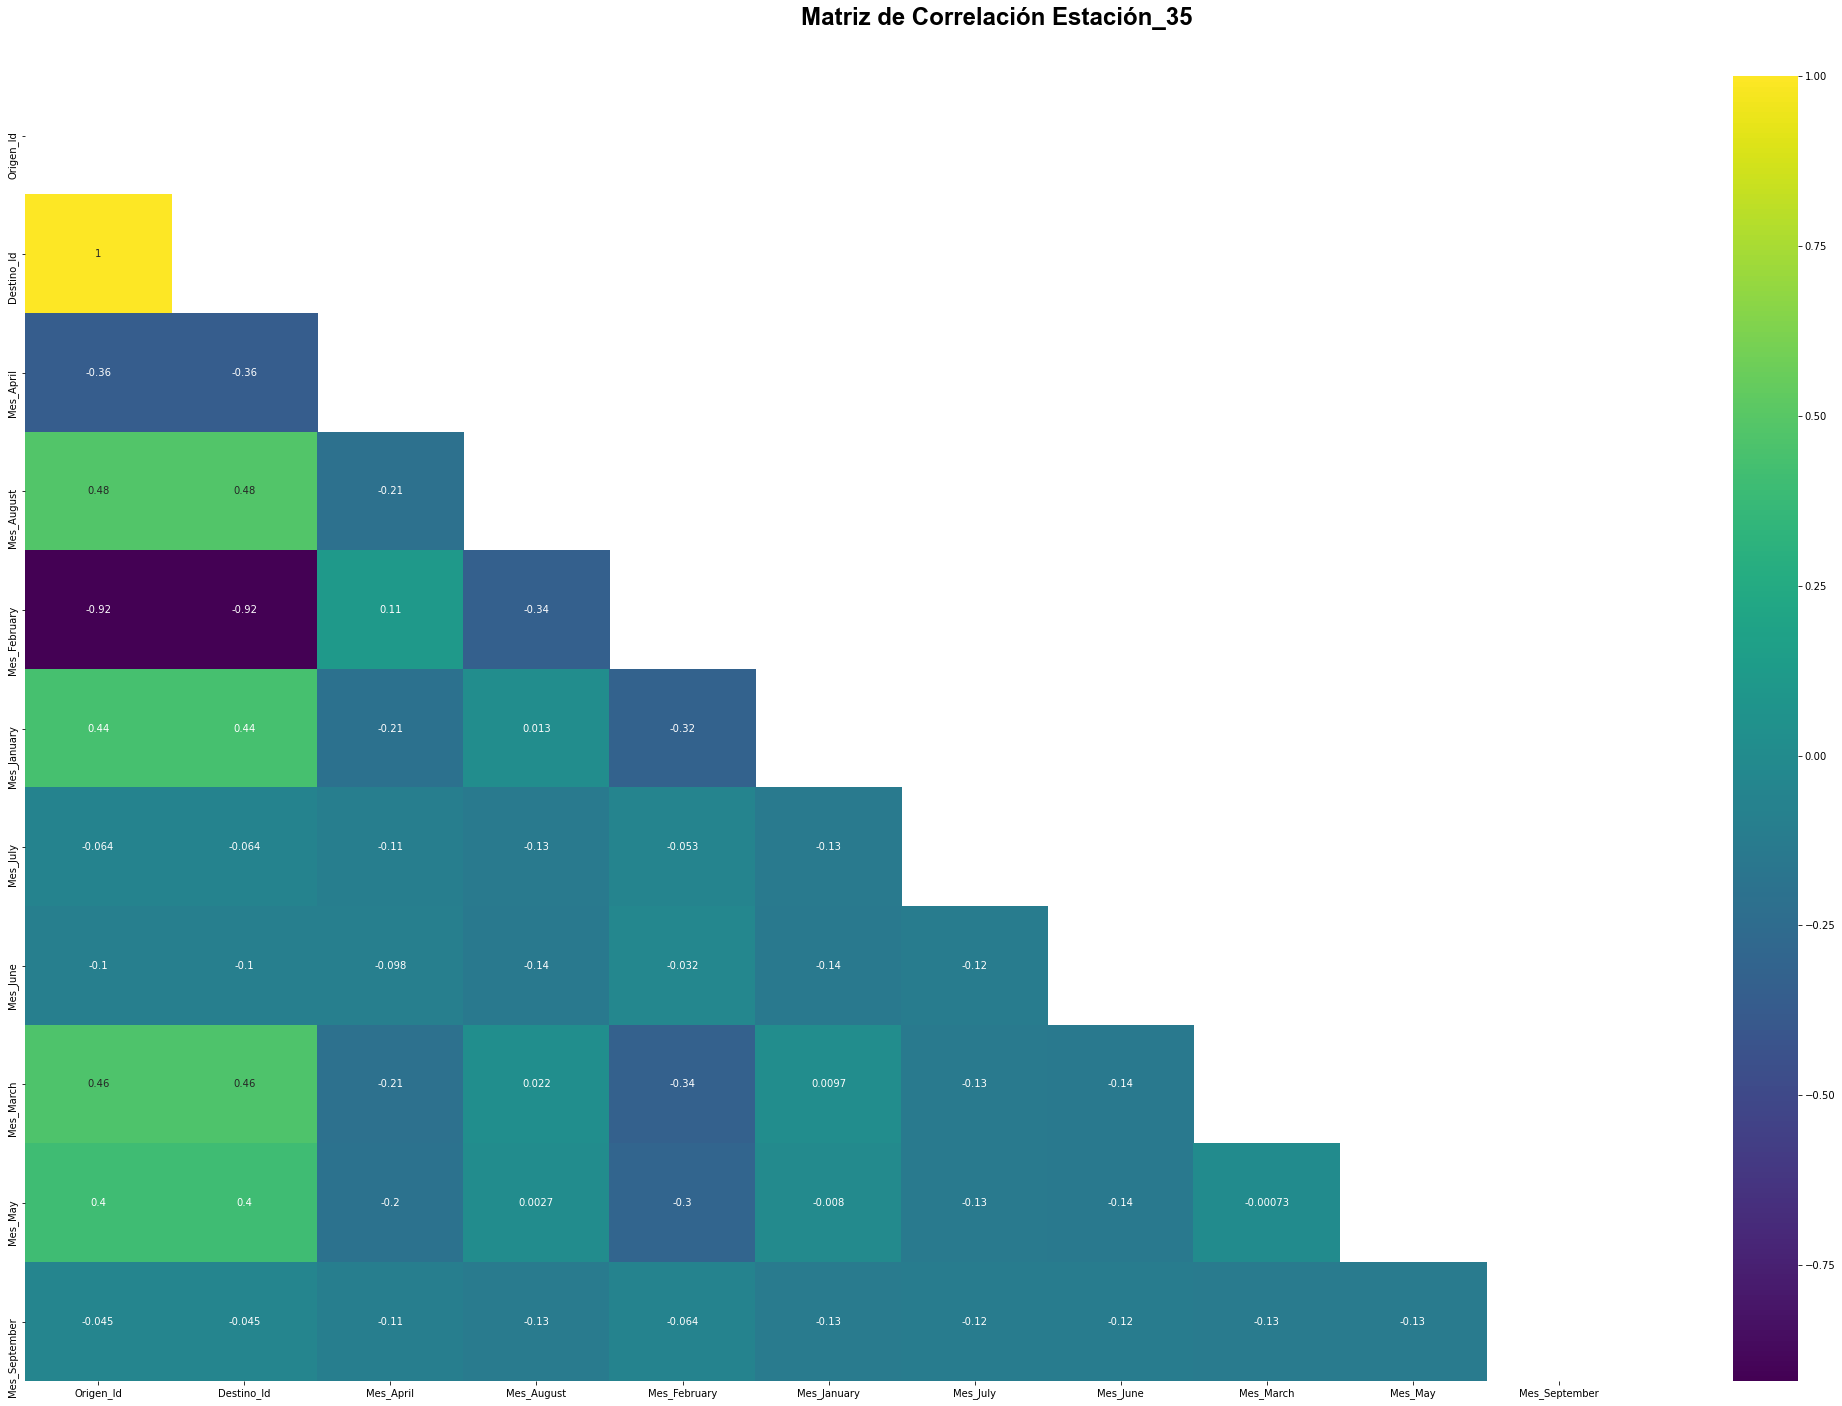

In [19]:
import seaborn as sns
correlacion = estacion_35.corr()

figsize=(36,24)
        
fig = plt.figure(figsize = figsize)

# Título
plt.suptitle(
    "Matriz de Correlación Estación_35",
    color='black',
    fontsize=24,
    #loc='center',
    fontweight='bold',
    style='normal',
    family='Arial',
    x = 0.5,
    y=0.92)

# Subtítulo de gráfico

#nota = '''Nota: NO hay multicolinealidad en algunas variables'''

n = ''
#fig.text(0.5, 0.87, nota, ha='center', fontsize=12, style ='italic', family='Arial')

# creating mask
mask = np.triu(np.ones_like(correlacion))

sns.heatmap(correlacion.corr(), annot = True, mask=mask,
            cmap = 'viridis');


plt.show()

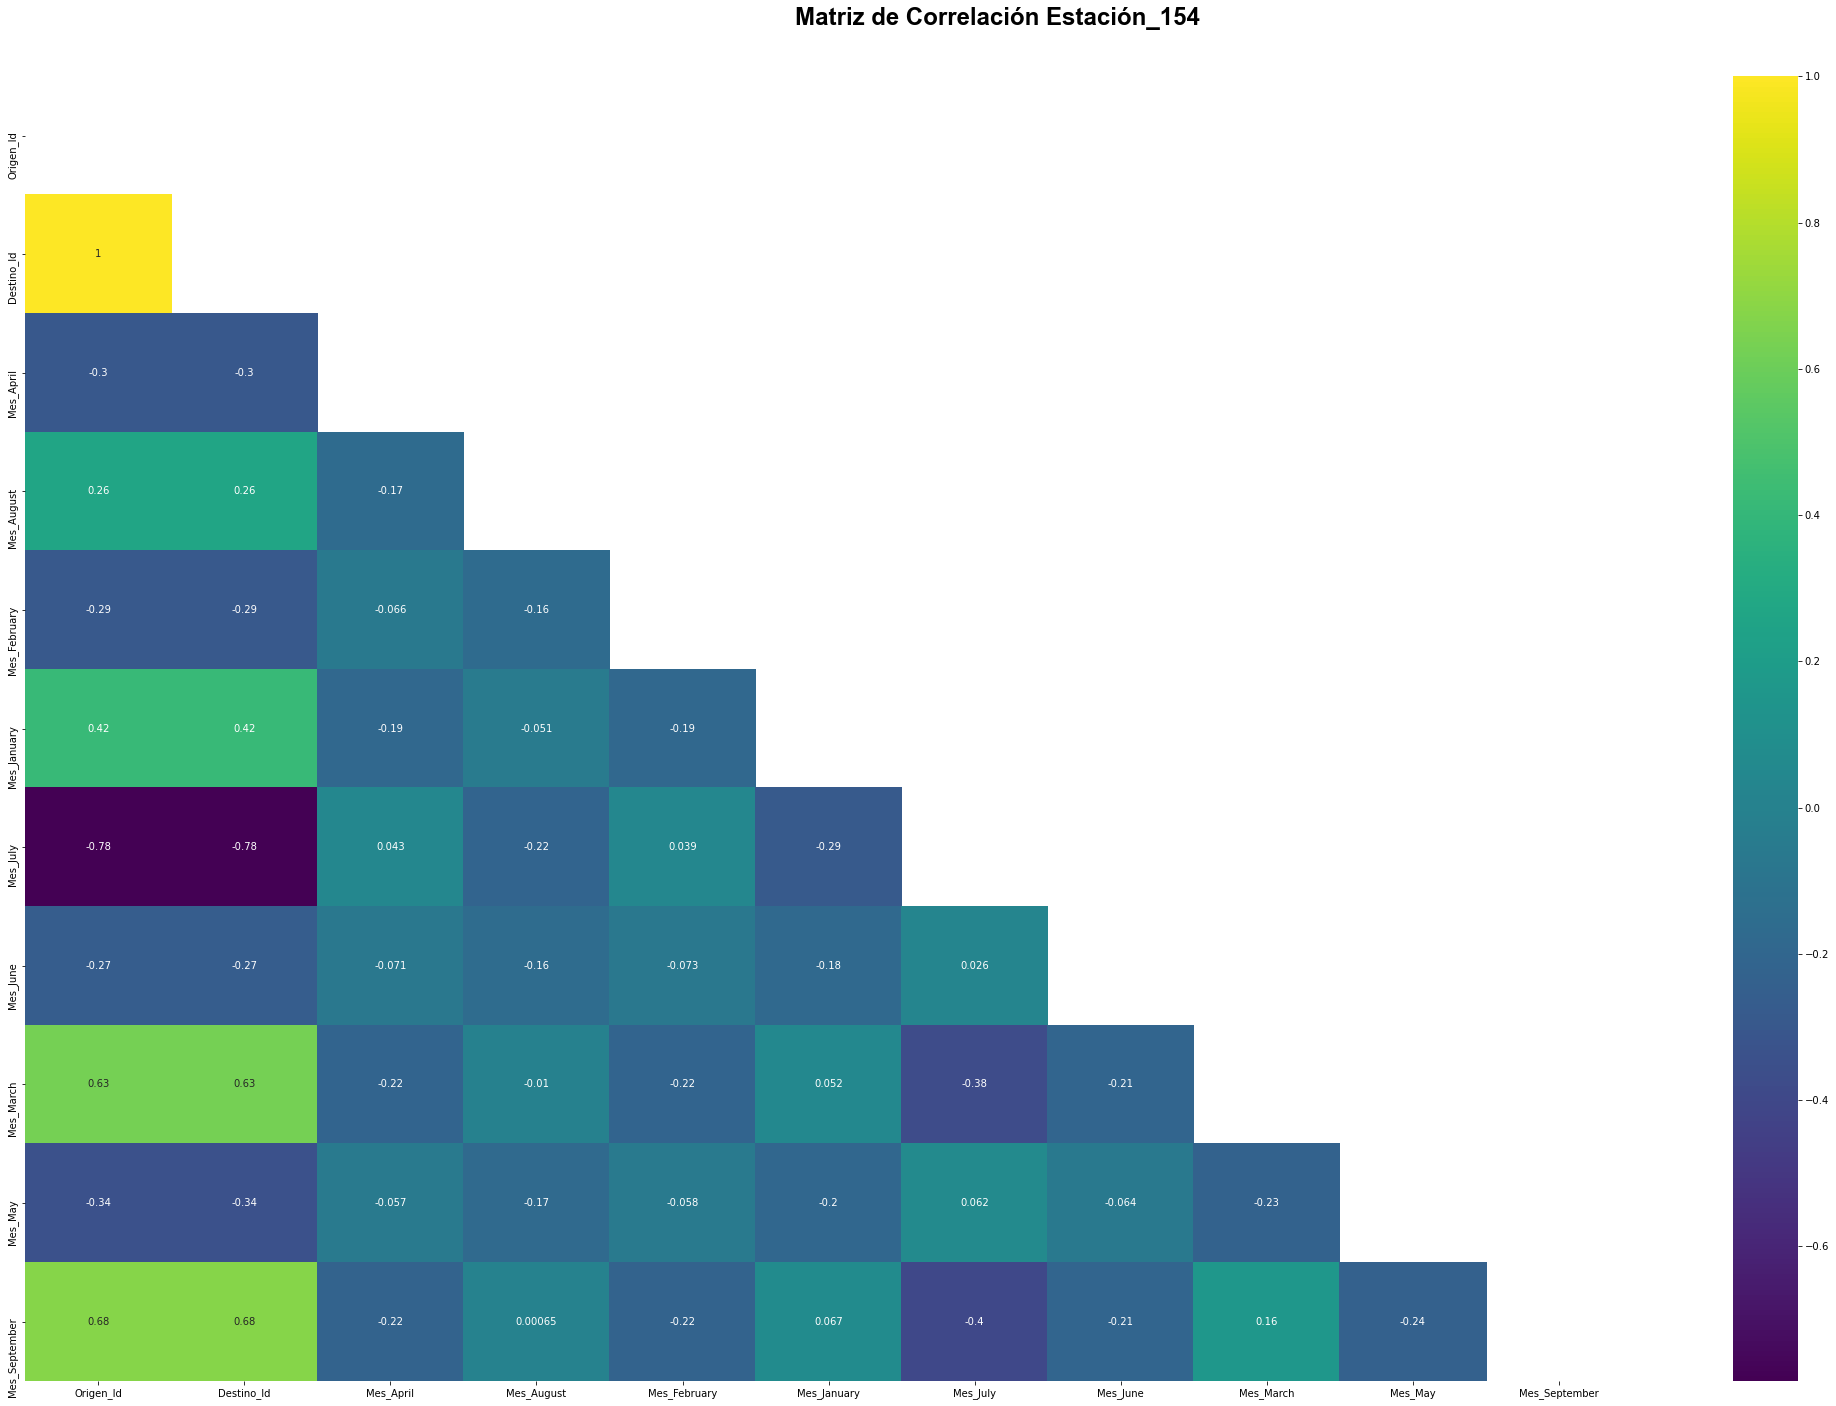

In [20]:
correlacion = estacion_154.corr()

figsize=(36,24)
        
fig = plt.figure(figsize = figsize)

# Título
plt.suptitle(
    "Matriz de Correlación Estación_154",
    color='black',
    fontsize=24,
    #loc='center',
    fontweight='bold',
    style='normal',
    family='Arial',
    x = 0.5,
    y=0.92)

# Subtítulo de gráfico

#nota = '''Nota: NO hay multicolinealidad en algunas variables'''

n = ''
#fig.text(0.5, 0.87, nota, ha='center', fontsize=12, style ='italic', family='Arial')

# creating mask
mask = np.triu(np.ones_like(correlacion))

sns.heatmap(correlacion.corr(), annot = True, mask=mask,
            cmap = 'viridis');


plt.show()

Aunque me hiciera sentido que no tuvieran correlación las variables, hice la matriz para verificar porque la r2 que sea igual a 1 me parece extremadamente perfecto y eso está sospechoso.